학적 데이터 결측치 처리

In [2]:
import pandas as pd

In [4]:
student = pd.read_excel('studenttable.xlsx')
student.head()

,ID,계열,1전공,2전공
0,A80M14G,글로벌융합대학,글로벌융합대학,NaN
1,L54N88F,글로벌융합대학,글로벌융합대학,NaN
2,T68H42P,글로벌융합대학,글로벌융합대학,NaN
3,R28D69X,글로벌융합대학,글로벌융합대학,NaN
4,T79R76T,글로벌융합대학,글로벌융합대학,NaN


In [5]:
student = student.fillna('없음')

In [6]:
student.head()

,ID,계열,1전공,2전공
0,A80M14G,글로벌융합대학,글로벌융합대학,없음
1,L54N88F,글로벌융합대학,글로벌융합대학,없음
2,T68H42P,글로벌융합대학,글로벌융합대학,없음
3,R28D69X,글로벌융합대학,글로벌융합대학,없음
4,T79R76T,글로벌융합대학,글로벌융합대학,없음


교양 수업 수강 내역 feature 만들기

In [9]:
cls = pd.read_excel('classtable.xlsx')
cls.head(50)

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,ID,class
0,A11O14V,공학계열
1,A11O14V,자연과학계열
2,A11O14V,인문사회계열
3,A11O14V,예체능계열
4,A11O14V,인문사회계열
5,A11O14V,인문사회계열
6,A11O14V,인문사회계열
7,A11O14V,인문사회계열
8,A11O14V,자연과학계열
9,A11O14V,인문사회계열


In [10]:
cls['class'].unique()

array(['공학계열', '자연과학계열', '인문사회계열', '예체능계열'], dtype=object)

In [ ]:
eng, nsc, gen, art = 0, 0, 0, 0

In [ ]:
# 각 계열의 개수를 세어서 새로운 열로 추가
cls['eng'] = (cls['class'] == '공학계열').astype(int)
cls['nsc'] = (cls['class'] == '자연과학계열').astype(int)
cls['gen'] = (cls['class'] == '인문사회계열').astype(int)
cls['art'] = (cls['class'] == '예체능계열').astype(int)

# ID를 기준으로 각 계열의 합계 계산
result = cls.groupby('ID').agg({'eng': 'sum', 'nsc': 'sum', 'gen': 'sum', 'art': 'sum'}).reset_index()


In [11]:
# 새로운 DataFrame 생성
result = pd.DataFrame()

# ID를 고유값으로 추출
unique_ids = cls['ID'].unique()

# 각 ID에 대해 계열별 개수를 세어서 새로운 열로 추가
for id in unique_ids:
    subset = cls[cls['ID'] == id]
    result = result.append({'ID': id,
                                  'eng': (subset['class'] == '공학계열').sum(),
                                  'nsc': (subset['class'] == '자연과학계열').sum(),
                                  'gen': (subset['class'] == '인문사회계열').sum(),
                                  'art': (subset['class'] == '예체능계열').sum()}, ignore_index=True)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
<ipython-input-11-fa6dab7df9f1>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'ID': id,
<ipython-input-11-fa6dab7df9f1>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'ID': id,
<ipython-input-11-fa6dab7df9f1>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'ID': id,
<ipython-input-11-fa6dab7df9f1>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'ID': id,
<ipython-input-11-fa6dab7df9f1>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [12]:
result.head()

,ID,eng,nsc,gen,art
0,A11O14V,1,2,6,1
1,A12S91U,2,2,35,4
2,A13J34S,1,1,3,0
3,A13Z24Y,1,1,23,0
4,A14E70A,9,3,8,6


In [14]:
# 각 열의 합 계산
result['total'] = result[['eng', 'nsc', 'gen', 'art']].sum(axis=1)

# 새로운 열 추가
result['eng_prop'] = result['eng'] / result['total']
result['nsc_prop'] = result['nsc'] / result['total']
result['gen_prop'] = result['gen'] / result['total']
result['art_prop'] = result['art'] / result['total']

In [15]:
result.head()

,ID,eng,nsc,gen,art,total,eng_prop,nsc_prop,gen_prop,art_prop
0,A11O14V,1,2,6,1,10,0.100000,0.200000,0.600000,0.100000
1,A12S91U,2,2,35,4,43,0.046512,0.046512,0.813953,0.093023
2,A13J34S,1,1,3,0,5,0.200000,0.200000,0.600000,0.000000
3,A13Z24Y,1,1,23,0,25,0.040000,0.040000,0.920000,0.000000
4,A14E70A,9,3,8,6,26,0.346154,0.115385,0.307692,0.230769


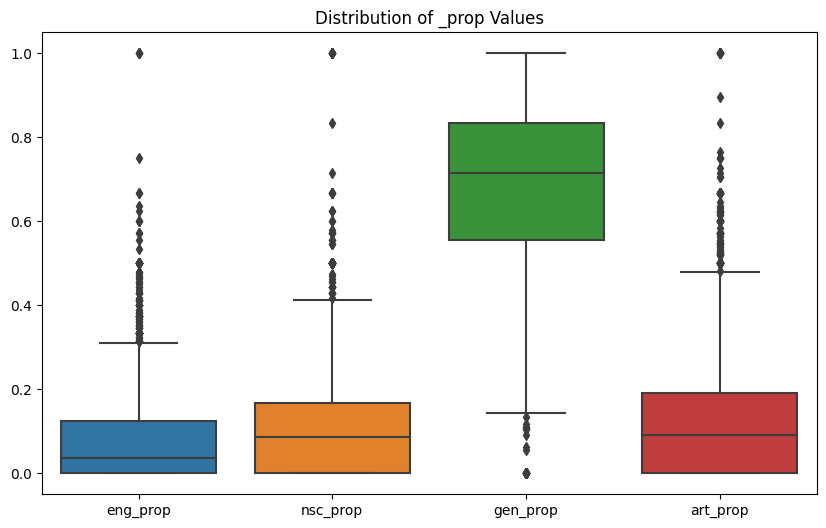

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# _prop 열만 선택
prop_columns = ['eng_prop', 'nsc_prop', 'gen_prop', 'art_prop']
prop = result[prop_columns]

# boxplot 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=prop)
plt.title('Distribution of _prop Values')
plt.show()

In [19]:
prop.describe(percentiles=[.25, .5, .75])

,eng_prop,nsc_prop,gen_prop,art_prop
count,4173.000000,4173.000000,4173.000000,4173.000000
mean,0.076326,0.110592,0.687693,0.125389
std,0.105636,0.122816,0.207256,0.148541
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.555556,0.000000
50%,0.037037,0.085714,0.714286,0.090909
75%,0.125000,0.166667,0.833333,0.192308
max,1.000000,1.000000,1.000000,1.000000


In [20]:
# 각 카테고리에 대한 기준값 설정
eng_threshold = 0.037
nsc_threshold = 0.085
gen_threshold = 0.715
art_threshold = 0.091

# 각 열에 대한 카테고리 부여
result['eng_cat'] = pd.cut(result['eng_prop'], bins=[-1, eng_threshold, 0.125, 1], labels=['하', '중', '상'])
result['nsc_cat'] = pd.cut(result['nsc_prop'], bins=[-1, nsc_threshold, 0.167, 1], labels=['하', '중', '상'])
result['gen_cat'] = pd.cut(result['gen_prop'], bins=[-1, gen_threshold, 0.834, 1], labels=['하', '중', '상'])
result['art_cat'] = pd.cut(result['art_prop'], bins=[-1, art_threshold, 0.193, 1], labels=['하', '중', '상'])

In [22]:
result.head(50)

,ID,eng,nsc,gen,art,total,eng_prop,nsc_prop,gen_prop,art_prop,eng_cat,nsc_cat,gen_cat,art_cat
0,A11O14V,1,2,6,1,10,0.100000,0.200000,0.600000,0.100000,중,상,하,중
1,A12S91U,2,2,35,4,43,0.046512,0.046512,0.813953,0.093023,중,하,중,중
2,A13J34S,1,1,3,0,5,0.200000,0.200000,0.600000,0.000000,상,상,하,하
3,A13Z24Y,1,1,23,0,25,0.040000,0.040000,0.920000,0.000000,중,하,상,하
4,A14E70A,9,3,8,6,26,0.346154,0.115385,0.307692,0.230769,상,중,하,상
5,A14L48K,0,0,2,3,5,0.000000,0.000000,0.400000,0.600000,하,하,하,상
6,A17Q63W,0,5,2,0,7,0.000000,0.714286,0.285714,0.000000,하,상,하,하
7,A18T16X,2,0,16,0,18,0.111111,0.000000,0.888889,0.000000,중,하,상,하
8,A18U80Q,7,0,10,0,17,0.411765,0.000000,0.588235,0.000000,상,하,하,하
9,A19A37C,0,1,5,0,6,0.000000,0.166667,0.833333,0.000000,하,중,중,하


In [23]:
result_columns = ['ID', 'eng_cat', 'nsc_cat', 'gen_cat', 'art_cat']

# 데이터프레임 병합
final = pd.merge(student, result[result_columns], on='ID', how='left')
final.head(50)

,ID,계열,1전공,2전공,eng_cat,nsc_cat,gen_cat,art_cat
0,A80M14G,글로벌융합대학,글로벌융합대학,없음,하,하,중,상
1,L54N88F,글로벌융합대학,글로벌융합대학,없음,하,중,하,상
2,T68H42P,글로벌융합대학,글로벌융합대학,없음,하,하,상,하
3,R28D69X,글로벌융합대학,글로벌융합대학,없음,하,상,하,상
4,T79R76T,글로벌융합대학,글로벌융합대학,없음,하,하,중,상
5,A36P47L,글로벌융합대학,글로벌융합대학,없음,하,하,상,하
6,J55K18Q,글로벌융합대학,글로벌융합대학,없음,하,상,하,상
7,S44H82K,글로벌융합대학,글로벌융합대학,없음,하,하,상,하
8,C23L15A,글로벌융합대학,글로벌융합대학,없음,하,하,상,하
9,O49B46H,글로벌융합대학,글로벌융합대학,없음,하,하,중,상


In [24]:
len(final)

4201

In [25]:
final = final.dropna()
len(final)

4172

In [26]:
final.head(50)

,ID,계열,1전공,2전공,eng_cat,nsc_cat,gen_cat,art_cat
0,A80M14G,글로벌융합대학,글로벌융합대학,없음,하,하,중,상
1,L54N88F,글로벌융합대학,글로벌융합대학,없음,하,중,하,상
2,T68H42P,글로벌융합대학,글로벌융합대학,없음,하,하,상,하
3,R28D69X,글로벌융합대학,글로벌융합대학,없음,하,상,하,상
4,T79R76T,글로벌융합대학,글로벌융합대학,없음,하,하,중,상
5,A36P47L,글로벌융합대학,글로벌융합대학,없음,하,하,상,하
6,J55K18Q,글로벌융합대학,글로벌융합대학,없음,하,상,하,상
7,S44H82K,글로벌융합대학,글로벌융합대학,없음,하,하,상,하
8,C23L15A,글로벌융합대학,글로벌융합대학,없음,하,하,상,하
9,O49B46H,글로벌융합대학,글로벌융합대학,없음,하,하,중,상


In [28]:
final.to_excel('finaldata.xlsx')